# Hierarchical Clustering 

dev:mehdi sahraei

[my github](https://github.com/mehdisahraeei/ml-project)

### Importing libraries


In [4]:
import numpy as np 
import pandas as pd
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

### Reading the data with pandas


In [5]:
pdf = pd.read_csv('segmentation data.csv')
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (2000, 7)


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


### Normalization

In [13]:
featureset = pdf[['Age','Education','Income']]

In [15]:
from sklearn.preprocessing import MinMaxScaler


x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.84482759, 0.66666667, 0.32478101],
       [0.06896552, 0.33333333, 0.42021043],
       [0.53448276, 0.33333333, 0.19514353],
       [0.46551724, 0.33333333, 0.49622348],
       [0.60344828, 0.33333333, 0.41384189]])

### clustering using scipy
- obtaining distance

In [21]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])       
D   

/tmp/ipykernel_5277/1927950562.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.84981165, 0.47353025, ..., 0.9215612 , 0.81870869,
        1.00554231],
       [0.84981165, 0.        , 0.51707003, ..., 0.43654836, 0.19610422,
        0.45215046],
       [0.47353025, 0.51707003, 0.        , ..., 0.45555522, 0.43222204,
        0.53676339],
       ...,
       [0.9215612 , 0.43654836, 0.45555522, ..., 0.        , 0.35702332,
        0.12257348],
       [0.81870869, 0.19610422, 0.43222204, ..., 0.35702332, 0.        ,
        0.3508286 ],
       [1.00554231, 0.45215046, 0.53676339, ..., 0.12257348, 0.3508286 ,
        0.        ]])

In [22]:
import pylab
import scipy.cluster.hierarchy

# linkage methods are used to compute the distance d(s,t) between two clusters
Z = hierarchy.linkage(D, 'complete')
Z

/tmp/ipykernel_5277/3557054515.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


array([[8.83000000e+02, 1.00400000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.73000000e+02, 1.15900000e+03, 9.68023043e-05, 2.00000000e+00],
       [5.33000000e+02, 1.89600000e+03, 2.66566094e-04, 2.00000000e+00],
       ...,
       [3.99300000e+03, 3.99500000e+03, 2.01364438e+01, 1.77700000e+03],
       [3.99100000e+03, 3.99400000e+03, 2.39109987e+01, 2.23000000e+02],
       [3.99600000e+03, 3.99700000e+03, 3.76261736e+01, 2.00000000e+03]])

In [37]:
from scipy.cluster.hierarchy import fcluster
max_d= 15 # n is the number of similar values
clusters = fcluster(Z, max_d, criterion='distance')
clusters[5:]

array([2, 3, 2, ..., 1, 2, 1], dtype=int32)

In [47]:
from scipy.cluster.hierarchy import fcluster
k = 4 # n cluster
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 1, 1, ..., 1, 1, 1], dtype=int32)

In [48]:
unique_clusters = np.unique(clusters)
len(unique_clusters)

4

### dendrogram

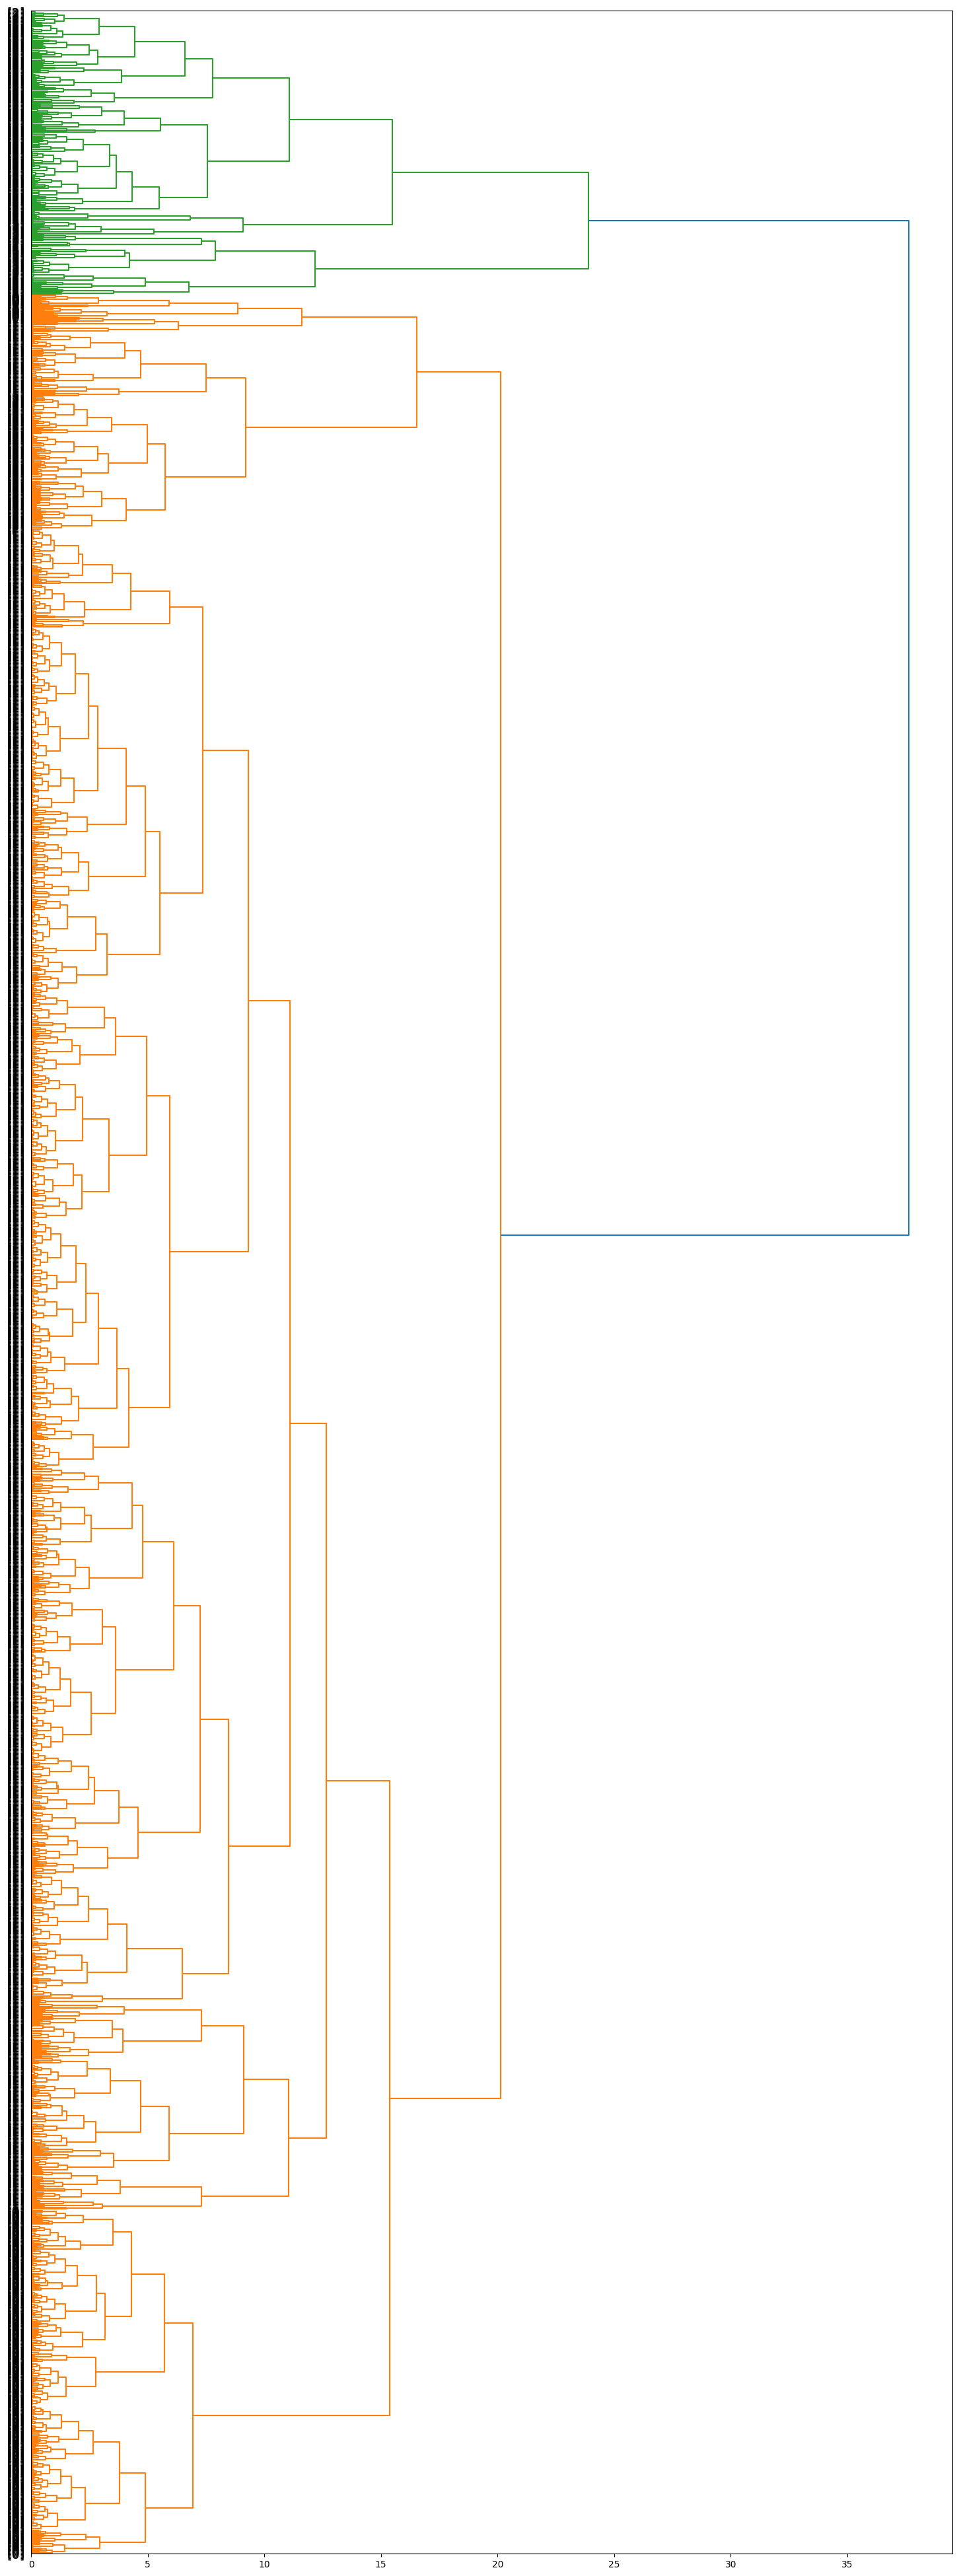

In [51]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' % (int(float(pdf['Education'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =14, orientation = 'right')

### Clustering using scikit-learn
- obtaining distance

In [59]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.84981165 0.47353025 ... 0.9215612  0.81870869 1.00554231]
 [0.84981165 0.         0.51707003 ... 0.43654836 0.19610422 0.45215046]
 [0.47353025 0.51707003 0.         ... 0.45555522 0.43222204 0.53676339]
 ...
 [0.9215612  0.43654836 0.45555522 ... 0.         0.35702332 0.12257348]
 [0.81870869 0.19610422 0.43222204 ... 0.35702332 0.         0.3508286 ]
 [1.00554231 0.45215046 0.53676339 ... 0.12257348 0.3508286  0.        ]]


In [60]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_5277/1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


In [61]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/home/mahdi/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([3, 0, 0, ..., 0, 0, 0])

- addding to pdf

In [63]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,4


### exploration

In [75]:
#groupby is used for grouping the data points 
pdf.groupby(['cluster_','Education'])['cluster_'].count()

cluster_  Education
0         0             271
          1            1321
1         0              16
          1              14
2         2              22
          3              25
3         2             158
4         1              50
          2             105
5         1               1
          2               6
          3              11
Name: cluster_, dtype: int64

In [76]:
pdf.groupby(['cluster_','Education'])['cluster_'].mean()

cluster_  Education
0         0            0.0
          1            0.0
1         0            1.0
          1            1.0
2         2            2.0
          3            2.0
3         2            3.0
4         1            4.0
          2            4.0
5         1            5.0
          2            5.0
          3            5.0
Name: cluster_, dtype: float64